# Real World Examples

## Utilities

In [1]:
import sys
from pathlib import Path
parent_dir = str(Path().resolve().parent)
sys.path.append(parent_dir)

import random
import warnings

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

from utils import seed_all, true_pmf, empirical_pmf

In [2]:
seed_all(42)

Using Seed Number 42


## Call Center Simulation

This example is taken from {cite}`yiu_2019`, please take a look at this author's articles, really good!

Let $X$ be the ***success conversion call status*** of a ***randomly chosen call made by 1 single employee***.

In other words, let $X$ be the ***outcome of a call*** of a ***randomly chosen call made by 1 single employee*** where the outcome is either success or failure in conversion.

Then we can model the ***probability of success*** of a call made by a ***randomly chosen employee*** as 
a Bernoulli random variable $X$ with parameter $p$ where $p$ is the ***probability of success*** of a call made by a ***randomly chosen employee***.
We define $p=0.04$ here.

- The sample space $\S = \{0,1\}$ where $0$ represents ***failure*** and $1$ represents ***success***.
- The event space $\E = \{\emptyset, \{0\}, \{1\}, \{0,1\}\}$.
- The probability measure $\P$ is defined as follows:
    - $\P(\emptyset) = 0$
    - $\P(\{0\}) = 1-p = 0.96$
    - $\P(\{1\}) = p = 0.04$
    - $\P(\{0,1\}) = 1$
- Thus our random variable $X$ is just $X: \S \to \R$ where $X(\{0\}) = 0$ and $X(\{1\}) = 1$, 
or $X(0) = 0$ and $X(1) = 1$.
- The PMF is fully determined by
  
  $$
  \begin{align}
    f_X(x) = \P(X=x) = \begin{cases}
        0.96  & \text{if } x = 0 \\
        0.04  & \text{if } x = 1
    \end{cases}
  \end{align}
  $$
- $X$ is a Bernoulli Trial because we can think of it as 1 single person tossing 1 coin, then the corresponding
random variable is **Let $X$ be the outcome of the coin toss made by a random toss by 1 single person.** Therefore,
it can be made to fit as a Bernoulli Trial if we assume the assumptions.

Now the above details a ***single call*** made by a ***randomly chosen employee***, which follows a Bernoulli distribution.
You can associate this with a ***single coin toss*** made by a ***randomly chosen person***, which also follows a Bernoulli distribution.

Now, a single employee can make multiple calls (a sequence of calls can be $X_1, X_2, \ldots, X_{50}$),
if he/she does $n$ such calls which are **identically and independently distributed** (i.i.d.),
then we can define $Y$ to be the ***number of successful conversion calls***, which now follows a ***Binomial distribution*** because
each call made by the employee is $\iid$ and follows a Bernoulli distribution with constant parameter $p$.

We can define our $Y$ as follows since $n=50$ and $p=0.04$:

$$
Y \sim \binomial(50, 0.04)
$$

So $Y = X_0 + X_1 + \ldots + X_{50}$ in this scenario, note $Y$ is still made by 1 single employee.
It is just the total number of successful conversion calls made by 1 single employee.

Each call by 1 single employee is $\iid$, this means it is similar idea to 1 single person tossing 1 coin 50 times.

Below is a realization of the PMF of $Y$:

$$
\begin{align}
\P(Y=y) = \begin{cases}
0.12988579352203838   &\quad \text{ if } y=0 \\
0.2705954031709139   &\quad \text{ if } y=1 \\
0.27623280740364115 &\quad \text{ if } y=2 \\
\vdots &\quad \vdots \\
1.2676506002282307e-70   &\quad \text{ if } y=10 \\
\end{cases}
\end{align}
$$

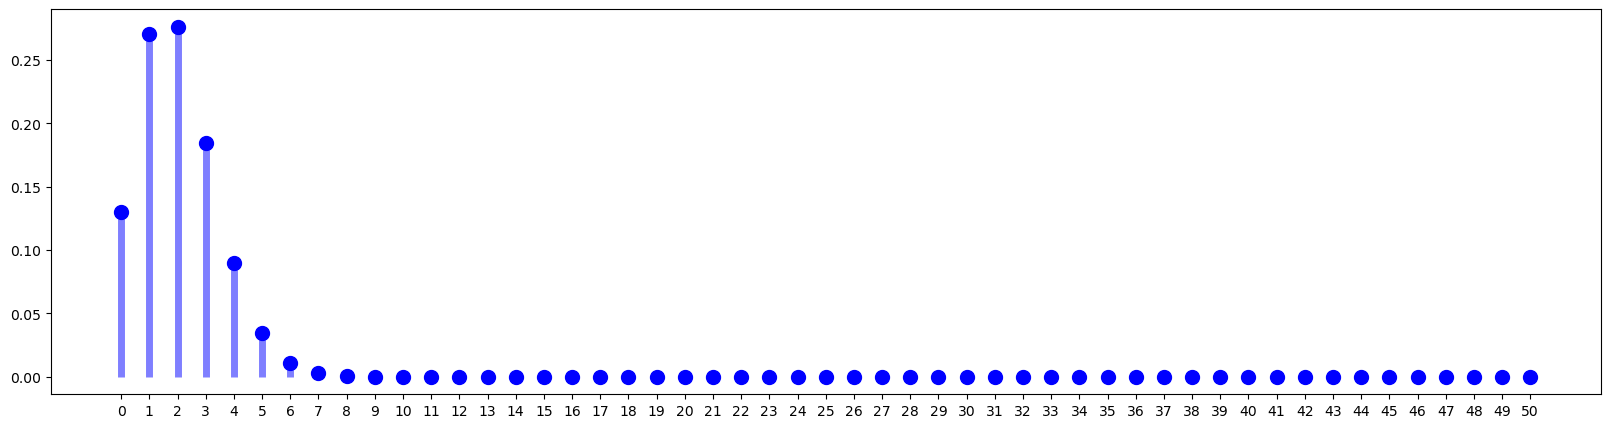

In [34]:
p = 0.04
n = 50

# our random variable Y
Y = stats.binom(n, p)

y = np.arange(n + 1)  # [0, 1, ..., 50]

f = Y.pmf(y)  # pmf P(Y=0) P(Y=1)

fig = plt.figure(figsize=(20, 5))
plt.plot(y, f, "bo", ms=10)
plt.vlines(y, 0, f, colors="b", lw=5, alpha=0.5)
plt.xticks(y)
plt.show();

In [36]:
for y in range(51):
    print(f"PMF for Y={y} is {Y.pmf(y)}")

PMF for Y=0 is 0.12988579352203838
PMF for Y=1 is 0.2705954031709139
PMF for Y=2 is 0.27623280740364115
PMF for Y=3 is 0.18415520493576068
PMF for Y=4 is 0.09015931908313288
PMF for Y=5 is 0.03456107231520094
PMF for Y=6 is 0.010800335098500296
PMF for Y=7 is 0.002828659192464365
PMF for Y=8 is 0.0006335017983123338
PMF for Y=9 is 0.00012318090522739773
PMF for Y=10 is 2.1043404643013807e-05
PMF for Y=11 is 3.1883946428808775e-06
PMF for Y=12 is 4.317617745567845e-07
PMF for Y=13 is 5.2586369978069964e-08
PMF for Y=14 is 5.790760979727912e-09
PMF for Y=15 is 5.790760979727948e-10
PMF for Y=16 is 5.278037351314524e-11
PMF for Y=17 is 4.398364459428767e-12
PMF for Y=18 is 3.3598617398414237e-13
PMF for Y=19 is 2.3577977121694196e-14
PMF for Y=20 is 1.5227443557760843e-15
PMF for Y=21 is 9.063954498667164e-17
PMF for Y=22 is 4.978308342070981e-18
PMF for Y=23 is 2.525228869166441e-19
PMF for Y=24 is 1.1837010324217706e-20
PMF for Y=25 is 5.129371140494332e-22
PMF for Y=26 is 2.05503651462

With this realized state of the theoretical (true) PMF, we can employ **generative/synthesis** method to generate
samples from this distribution because **we assumed that $Y$ follows a Binomial distribution prior**.

So if we have `Y.rvs(size = 10)`, it simply means generate a sequence 10 random variables $Y_1, Y_2, \ldots, Y_{10}$ of $Y$. 

In this context, we can be unambiguous and say that each random variable $Y_i$ corresponds to a randomly selected employee from the true population.
I think to be more precise, $Y_i$ should be the ***number of successful conversion calls*** made by a single randomly selected employee.

In [33]:
# generate states from binomial distribution
Y.rvs(size = 10)

array([1, 1, 2, 0, 3, 3, 1, 2, 3, 3], dtype=int64)

Here is the confusing part, why do we want to churn out 10 such random variables? We do know the true distribution, we know the expected value as well.

$$
\exp(Y) = np = 50 \times 0.04 = 2
$$

and therefore by this the **total revenue** can be

$$
2 \times 100 = 200
$$

per employee. And if you have 100 such employees, then it will be 

$$
200 \times 100 = 20000
$$

The expense you spent paying each employee is

$$
100 \times 200 = 20000
$$

so in the long run you do not earn any profits.

Here you can also define the total revenue as a random variable $Z = 100Y$.

By theory, we know that increasing either $n$ or $p$ will increase the expectation
$\exp \lsq Y \rsq$ since $n$ and $p$ are both positive. Consequently, increasing both at the same 
time will also guarantee an increase in expectation.

So the solutions to increase revenue/profits are:

- Increase $n$, the number of calls performed by 1 single employee;
- Increase $p$, the success rate of a call conversion by 1 single employee through techniques like not hard pressing the customers to buy something;

**Here is his 1000 days simulation**

To be more precise, he defined a new random variable $Z = 100Y$ means the revenue earned for a random day (any given day).

So 1000 times simulation.

But I can also find the expectation lols...

$$
\exp \lsq Z \rsq = \exp \lsq 100Y \rsq = 100 \exp \lsq Y \rsq = 100 \times 2 = 200
$$

Note very carefully the $100$ refers to the revenue earned per successful call conversion, not referring to $100$ employees in the previous section (consider changing the numbers so no confusion...)

In [41]:
#Z = Y + Y

TypeError: unsupported operand type(s) for +: 'rv_discrete_frozen' and 'rv_discrete_frozen'

In [39]:
p = 0.04
n = 50

# our random variable Y
Y = stats.binom(n, p)

In [15]:
help(Y)

Help on rv_discrete_frozen in module scipy.stats._distn_infrastructure object:

class rv_discrete_frozen(rv_frozen)
 |  rv_discrete_frozen(dist, *args, **kwds)
 |  
 |  Method resolution order:
 |      rv_discrete_frozen
 |      rv_frozen
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  logpmf(self, k)
 |  
 |  pmf(self, k)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from rv_frozen:
 |  
 |  __init__(self, dist, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cdf(self, x)
 |  
 |  entropy(self)
 |  
 |  expect(self, func=None, lb=None, ub=None, conditional=False, **kwds)
 |  
 |  interval(self, confidence=None, **kwds)
 |  
 |  isf(self, q)
 |  
 |  logcdf(self, x)
 |  
 |  logsf(self, x)
 |  
 |  mean(self)
 |  
 |  median(self)
 |  
 |  moment(self, order=None, **kwds)
 |  
 |  ppf(self, q)
 |  
 |  rvs(self, size=None, random_state=None)
 |  
 |  sf(self, x)
 |  
 

In [14]:
Y.pmf(12)

4.317617745567845e-07

In [19]:
Y.rvs(size=100)

array([4, 3, 2, 1, 1, 0, 4, 2, 3, 0, 5, 3, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 3, 1, 2, 2, 0, 2, 1, 0, 4, 5, 3, 1, 0, 3, 2, 0, 2, 0, 4, 1,
       2, 1, 2, 2, 1, 5, 3, 4, 4, 2, 4, 0, 1, 0, 1, 1, 1, 3, 1, 1, 2, 1,
       3, 0, 6, 3, 1, 0, 3, 3, 3, 3, 0, 1, 0, 4, 2, 1, 0, 1, 1, 3, 2, 4,
       2, 0, 3, 3, 2, 3, 2, 2, 2, 0, 0, 0], dtype=int64)

In [16]:
Y.mean() # np = 50 x 0.04

2.0

Theoretically, expectation of $Y$ is $2$ success. This means, 

<StemContainer object of 3 artists>

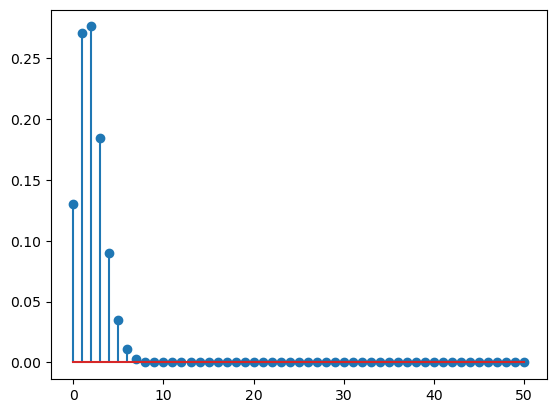

In [13]:
plt.stem(y, Y.pmf(y), use_line_collection=True)

In [21]:
n, p = 50, 0.04 # number of iid trials, probability of each trial
Y = stats.binom(n, p)
print(Y)

In [25]:
# generate states from binomial distribution
Y.rvs(size = 10)

array([1, 0, 2, 2, 4, 4, 2, 3, 2, 3], dtype=int64)

In [22]:
Y.stats(moments='mv')

(array(2.), array(1.92))

## Further Readings

- https://www.youtube.com/watch?v=qIzC1-9PwQo&list=PLvxOuBpazmsNIHP5cz37oOPZx0JKyNszN&index=4
- https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b

## Citations

```{bibliography}
:style: unsrt
:filter: docname in docnames
```